In [8]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
cd /content/drive/MyDrive/ai2/do an VN/foods

/content/drive/MyDrive/ai2/do an VN/foods


In [11]:
ls

'Banh pia'/  'Banh tet'/  'Banh xeo'/  'Chao long'/  'Com tam'/


In [19]:
import cv2
from pathlib import Path
flower_dataset_folder = '/content/drive/MyDrive/ai2/do an VN/foods'
classnames = []
for path in Path(flower_dataset_folder).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(classnames)
X = []
y = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path(classnames[i]).glob('*'))
  for image in range(int(0.4*len(images))):
    img = cv2.imread(str(images[image]))
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

['Banh xeo', 'Com tam', 'Banh tet', 'Chao long', 'Banh pia']
Banh xeo
Com tam
Banh tet
Chao long
Banh pia


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

In [21]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(136, 128, 128, 3)
(34, 128, 128, 3)
(136, 5)
(34, 5)


[0. 0. 0. 1. 0.]


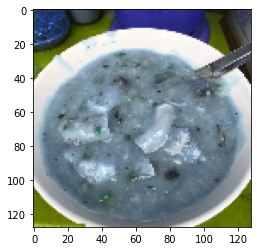

In [23]:
plt.imshow(X_train[4])
print(y_train[4])

In [24]:
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(y_train.shape[1], activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)       0

In [25]:
import keras
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
2/2 - 7s - loss: 1.5849 - accuracy: 0.1691 - 7s/epoch - 3s/step
Epoch 2/100
2/2 - 5s - loss: 2.6108 - accuracy: 0.2500 - 5s/epoch - 3s/step
Epoch 3/100
2/2 - 7s - loss: 1.5487 - accuracy: 0.2721 - 7s/epoch - 3s/step
Epoch 4/100
2/2 - 11s - loss: 1.5678 - accuracy: 0.3676 - 11s/epoch - 6s/step
Epoch 5/100
2/2 - 11s - loss: 1.5526 - accuracy: 0.2868 - 11s/epoch - 5s/step
Epoch 6/100
2/2 - 8s - loss: 1.5191 - accuracy: 0.2868 - 8s/epoch - 4s/step
Epoch 7/100
2/2 - 5s - loss: 1.5159 - accuracy: 0.3971 - 5s/epoch - 3s/step
Epoch 8/100
2/2 - 5s - loss: 1.4747 - accuracy: 0.4485 - 5s/epoch - 3s/step
Epoch 9/100
2/2 - 5s - loss: 1.4762 - accuracy: 0.2868 - 5s/epoch - 3s/step
Epoch 10/100
2/2 - 5s - loss: 1.3537 - accuracy: 0.4706 - 5s/epoch - 3s/step
Epoch 11/100
2/2 - 5s - loss: 1.3546 - accuracy: 0.4559 - 5s/epoch - 3s/step
Epoch 12/100
2/2 - 5s - loss: 1.3976 - accuracy: 0.4118 - 5s/epoch - 3s/step
Epoch 13/100
2/2 - 5s - loss: 1.2084 - accuracy: 0.4926 - 5s/epoch - 3s/step
Epoc

In [27]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 31ms/step - loss: 5.5541 - accuracy: 0.4118


[5.554092884063721, 0.4117647111415863]

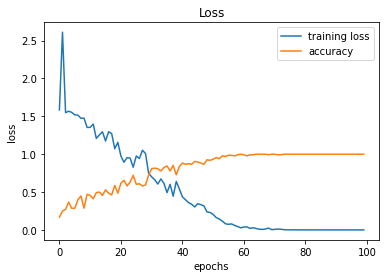

In [28]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
n = 1

(128, 128, 3)
1/1 [==============================] - 0s 130ms/step
Pred:  Chao long
True label:  Chao long


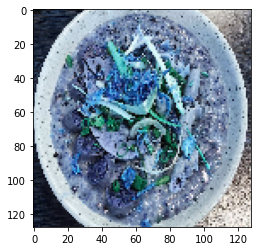

In [30]:
n+=1
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 128, 128, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 32ms/step
Pred:  Com tam
True label:  Banh tet


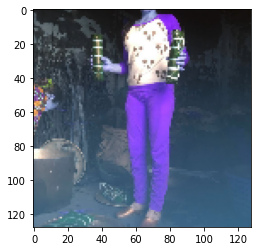

In [31]:
n+=1
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 128, 128, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 36ms/step
Pred:  Chao long
True label:  Com tam


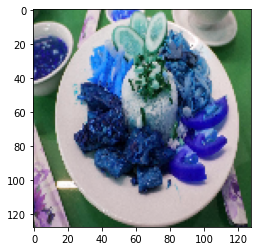

In [32]:
n+=1
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 128, 128, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])